In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_blobs

In [5]:
X, _ = make_blobs(centers=3 , random_state=42)

In [6]:
import seaborn as sns

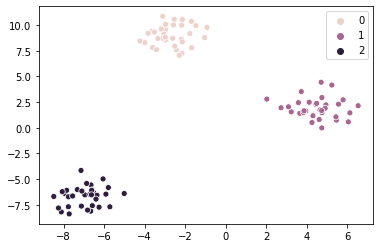

In [11]:
sns.scatterplot(X[:,0],X[:,1],hue=_)

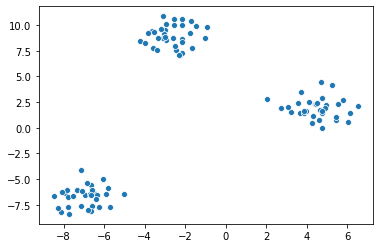

In [12]:
sns.scatterplot(X[:,0],X[:,1])

In [15]:
from sklearn.cluster import KMeans

In [22]:
model = KMeans(n_clusters=4)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [23]:
y_gen = model.labels_

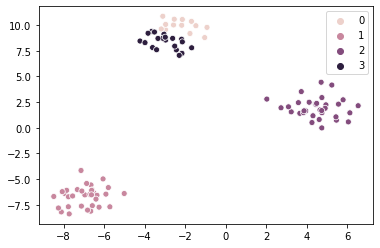

In [24]:
sns.scatterplot(X[:,0],X[:,1],hue=y_gen)

In [25]:
model.cluster_centers_

array([[-2.20127958,  9.94858935],
       [-6.95170962, -6.67621669],
       [ 4.49951001,  1.93892013],
       [-2.95660471,  8.30877152]])

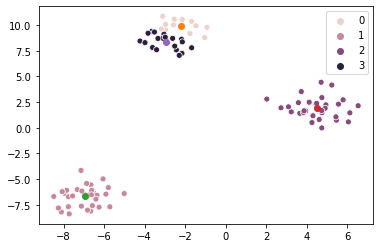

In [27]:
sns.scatterplot(X[:,0],X[:,1],hue=y_gen)

for center in model.cluster_centers_:
    plt.scatter(center[0],center[1])
    

In [28]:
import random

In [61]:
class Cluster:
    
    def __init__(self,center):
        self.center=center
        self.points=[]
        
    def distance(self,point):
        
        return np.sqrt(np.sum((point-self.center)**2))
        
class CustomKMeans:
    
    def __init__(self,n_clusters=3,max_inters=20):
        self.n_clusters = n_clusters
        self.max_inters = max_inters
        
    def fit(self, X):
        
        clusters = []
        for i in range(self.n_clusters):
            cluster = Cluster(center=random.choice(X))
            clusters.append(cluster)
            
        
            
        for i in range(self.max_inters):
            labels = []
            
            # going for each point
            for point in X:

                # collecting distances from every cluster
                distances = []
                for cluster in clusters:
                    distances.append(cluster.distance(point))


                # finding closest cluster
                closest_idx = np.argmin(distances)
                closest_cluster = clusters[closest_idx]
                closest_cluster.points.append(point)
                labels.append(closest_idx)

            for cluster in clusters:
                cluster.center = np.mean(cluster.points,axis=0)
                
            

            self.labels_ = labels
            self.cluster_centers_ = [cluster.center for cluster in clusters]


    

In [62]:
model = CustomKMeans(n_clusters=2)
model.fit(X)

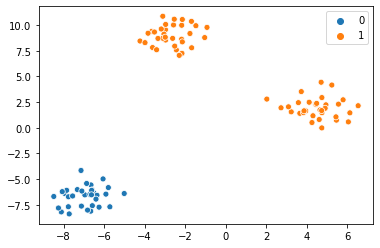

In [63]:
sns.scatterplot(X[:,0],X[:,1],hue=model.labels_)

